# Introduction to Data Science, CS 5963 / Math 3900
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/* 

## Lecture 12: Clustering II


In this lecture, we'll continue discussing clustering, emphasizing agglomerative clusering. 

Recommended Reading: ISLR, Ch. 10; Grus, Ch. 19; and the [scikit learn documentation](http://scikit-learn.org/stable/modules/clustering.html#k-means).

## Hierarchical Clustering

In scikit-learn, we can use the *AgglomerativeClustering* function. 

In [10]:
import numpy as np
from sklearn import metrics
import pandas as pd

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
# cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
cmap = ListedColormap(["Red","Green","Blue"])

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

Linkage methods in hierarchical clustering:
 * **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters.
 * **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.
 * **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
 
### Example: blob dataset

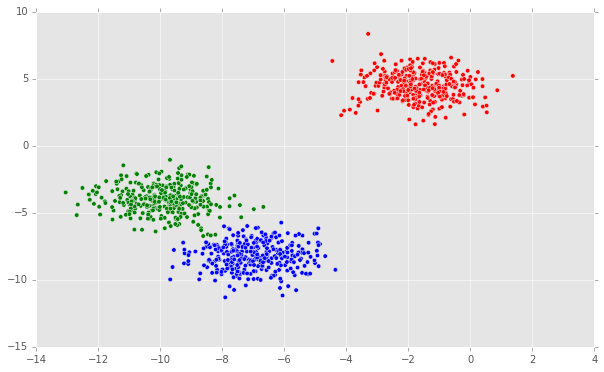

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.show()
 

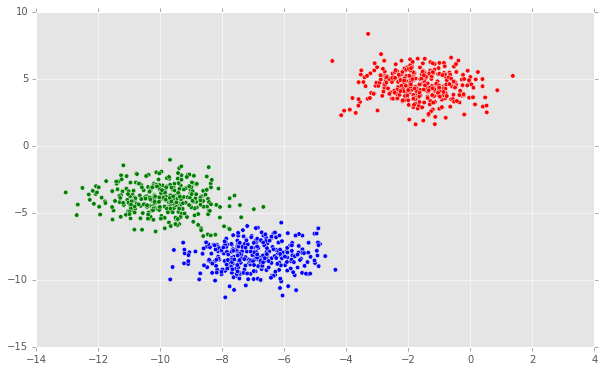

In [3]:
agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.show()

### Example: two moons dataset

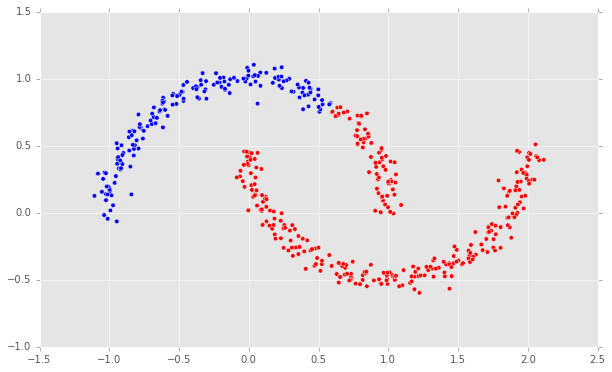

In [4]:
X_moons, y = make_moons(n_samples=500, noise=.05)

agg_cluster_model = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=2)
y_pred = agg_cluster_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.show()

Here we introduce a [connectivity constraint](http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py) based on k-Nearest Neighbors graph. That means that only adjacent clusters can be merged together. 

/opt/anaconda3/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:443: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


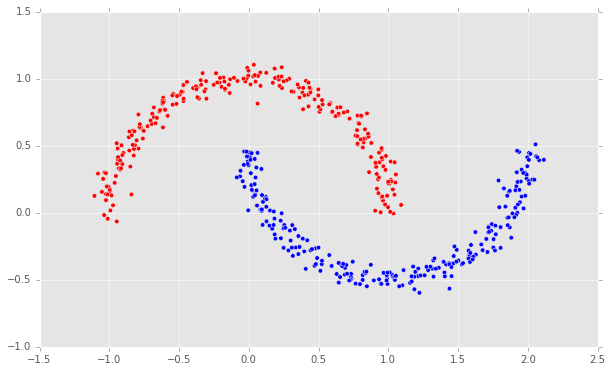

In [5]:
connectivity = kneighbors_graph(X_moons, n_neighbors=10, include_self=False)

agg_cluster_model = AgglomerativeClustering(linkage="complete", connectivity=connectivity, n_clusters=2)
y_pred = agg_cluster_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.show()

### Example: IRIS Dataset

Recall the Iris dataset consists of 4 measurements for 150 different examples of irises. We know that there are $k=3$  species of irises in the dataset. Without using the labels, let's try to find them. Note: this is a harder problem than classification since we're not using the (known) labels! 

In [6]:
# load dataset 
iris = load_iris()

X = iris.data
y = iris.target

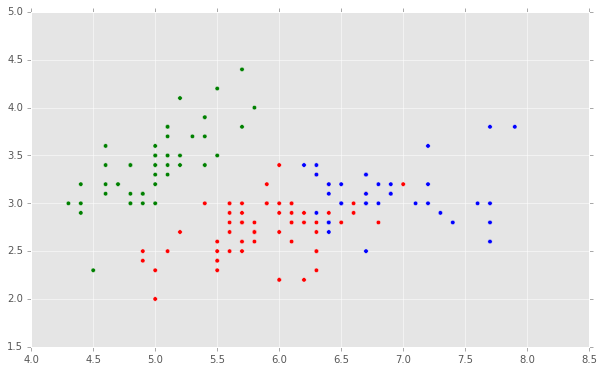

In [7]:
agg_cluster_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.show()

### Evaluating the 'homogeneity' or 'purity' of the clusters

As we saw last time, this is a little tricky to define. 

We want each cluster to contain points which are members of a single class. 

But, the clusters aren't associated with a class, so we have to consider all permutations of the clusters to see which best fits the given classes. 

The scikit-learn function *homogeneity_score* measures the percentage of points that match the given classes and is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way. 

In [12]:
homogeneity_score(labels_true = y, labels_pred = y_pred)

0.76080084697187234

In [41]:

models = [AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="average", affinity='manhattan', n_clusters=3),
         AgglomerativeClustering(linkage="complete", affinity='manhattan', n_clusters=3),
         KMeans(n_clusters=3)]
h = np.zeros(len(models))
for i,m in enumerate(models):
    y_pred = m.fit_predict(X)
    h[i] = homogeneity_score(labels_true = y, labels_pred = y_pred)
    print(h[i])

print('The winner is the ' + str(np.argmax(h)) + ' with homogeneity score ' + str(np.max(h)))
print('Method details:')
print(models[np.argmax(h)])

0.760800846972
0.795981622781
0.700115437096
0.769595565147
0.778176865951
0.751485402199
The winner is the 1 with homogeneity score 0.795981622781
Method details:
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=3, n_components=None,
            pooling_func=<function mean at 0x10b3ec158>)
